Final Project
## Ebru Dagdelen
12/4/2023 -12/12/2023

This notebook aims to analyze the previously cleaned datasets from 2022 crime statistic in New Jersey to answer the following quesions: 
1) Is there a specific identifier(age, race, sex) that is being targeted more?

2) What areas/counties of New Jersey have higher crime rates?

3) Withing the highest crime rates areas, what are the crimes that are most common?

4) Is there a relantionship of crimes and the time they occur?/What time intervals have what type of crime the most? When is the most crime done?

5) Where do different type of crimes happen the most(home,bus,school etc.)?

#### Import necessary modules.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import squarify

#### Bring in all the .csv files we cleaned up.

In [2]:
#Bring in all data files.
merged_county = '/Users/ebrushka/Desktop/python/Final Project/cleaneddatasets/county_data.csv'
merged_location = '/Users/ebrushka/Desktop/python/Final Project/cleaneddatasets/location_data.csv'
merged_time = '/Users/ebrushka/Desktop/python/Final Project/cleaneddatasets/time_data.csv'
merged_victims = '/Users/ebrushka/Desktop/python/Final Project/cleaneddatasets/victims_df.csv'

In [3]:
#Read each csv file into a Pandas DataFrame.
merged_county_df = pd.read_csv(merged_county)
merged_location_df = pd.read_csv(merged_location)
merged_time_df = pd.read_csv(merged_time)
merged_victims_df = pd.read_csv(merged_victims)

In [4]:
#merged_df = pd.merge(df_offense_by_agency, df_agencies[['pub_agency_name', 'county_name']], left_on='AgencyName', right_on='pub_agency_name', how='left')

# Drop the redundant column 'pub_agency_name' if needed
#merged_df = merged_df.drop(columns=['pub_agency_name'])
#merged_df

# Assuming your DataFrame is named merged_df
#total_offenses_by_county = merged_df.groupby('county_name')['TotalOffenses'].sum().reset_index()

# Print or visualize the resulting DataFrame
#print(total_offenses_by_county)

### 1) Is there a specific identifier(age, race, sex) that is being targeted more?

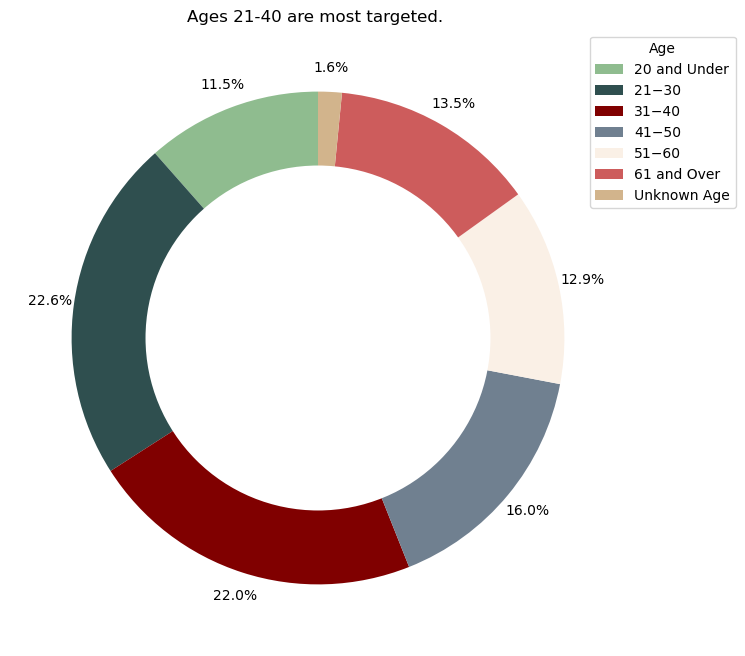

In [5]:
###Donut chart for age.###
#Here we will work with our victims data. 

#Let's group some ages together
age_columns_grouped = {
    '20 and Under': ['10andUnder', '11−15', '16−20'],
    '21−30': ['21−25', '26−30'],
    '31−40': ['31−35', '36−40'],
    '41−50': ['41−45', '46−50'],
    '51−60': ['51−55', '56−60'],
    '61 and Over': ['61−65', '66andOver'],
    'Unknown Age': ['UnknownAge']
}

#Extract all individual age categories for calculating total_age_crimes
age_columns = [age for ages in age_columns_grouped.values() for age in ages]

#Get the total number of age crimes for the percentages
total_age_crimes = sum(merged_victims_df.iloc[0][age] for age in age_columns)

#Calculate the percentage of each age group crime rate
age_values_grouped = [sum(merged_victims_df.iloc[0][ages] for ages in age_columns_grouped[group]) for group in age_columns_grouped]
percentage_values_grouped = [value / total_age_crimes * 100 for value in age_values_grouped]

#Create cleaned age columns for the legend
cleaned_age_columns_grouped = list(age_columns_grouped.keys())

#Create donut chart with grouped age categories
colors = ['darkseagreen', 'darkslategrey', 'maroon', 'slategrey', 'linen', 'indianred', 'tan', 'goldenrod']
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(percentage_values_grouped, autopct='%1.1f%%', startangle=90, pctdistance=1.1, colors=colors, wedgeprops=dict(width=0.4))
plt.legend(wedges, cleaned_age_columns_grouped, title="Age", loc="center left", bbox_to_anchor=(0.93, 0.35, 0.5, 1))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Ages 21-40 are most targeted. ')
plt.show()

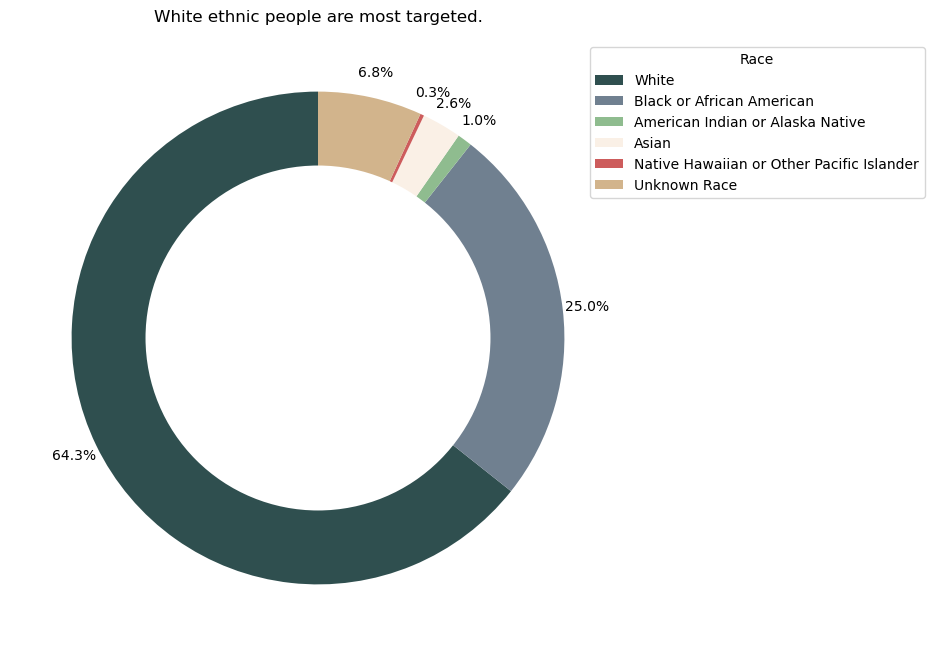

In [6]:
###Donut chart for race.###
#Here we will work with our victims data. 
#Get the total number of race crimes for the percentages. 
total_race_crimes = merged_victims_df.iloc[0]['Total_race']

#Extract the corresponding values for each race
race_columns = ['White', 'BlackorAfricanAmerican', 'AmericanIndianorAlaskaNative', 'Asian',
                'NativeHawaiianorOtherPacificIslander', 'UnknownRace']
race_values = [merged_victims_df.iloc[0][race] for race in race_columns]

#Calculate the percentage of each race crime rate
percentage_values = [value / total_race_crimes * 100 for value in race_values]

#Have a nice color palette for the graph and make sure the legend is nice and clean.
colors = ['darkslategrey', 'slategrey', 'darkseagreen', 'linen', 'indianred', 'tan', 'maroon']
cleaned_race_columns = ['White', 'Black or African American', 'American Indian or Alaska Native', 'Asian',
                'Native Hawaiian or Other Pacific Islander', 'Unknown Race']
#Create donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(percentage_values, autopct='%1.1f%%', startangle=90,pctdistance=1.1, colors  = colors, wedgeprops=dict(width=0.4))
plt.legend(wedges, cleaned_race_columns, title="Race", loc="center left", bbox_to_anchor=(0.93, 0.35, 0.5, 1))

#Draw a circle at the center to make the chart prettier
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('White ethnic people are most targeted.')
plt.show()

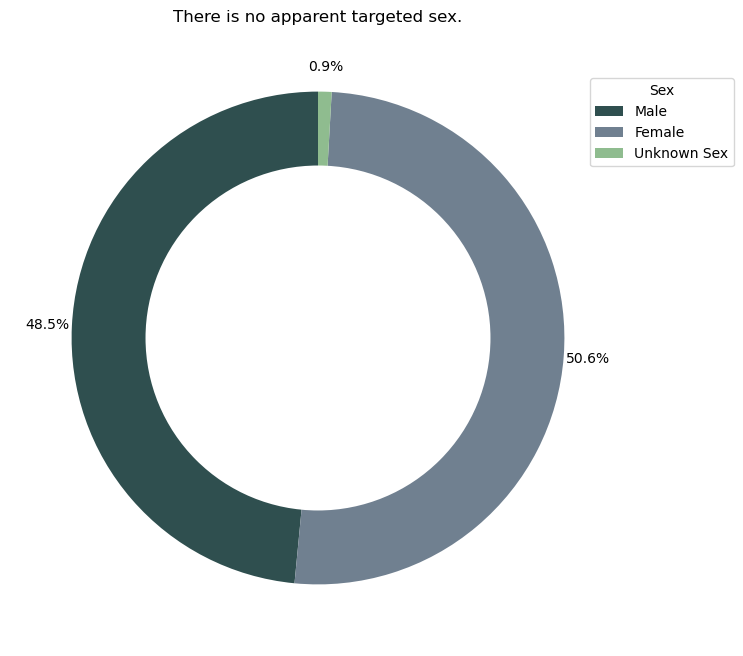

In [7]:
###Donut chart for sex.###
#Here we will work with our victims data. 
#Get the total number of sex crimes for the percentages. 
total_sex_crimes = merged_victims_df.iloc[0]['Total_sex']

#Extract the corresponding values for each race
sex_columns = ['Male', 'Female', 'UnknownSex']
sex_values = [merged_victims_df.iloc[0][sex] for sex in sex_columns]

#Calculate the percentage of each race crime rate
percentage_values = [value / total_sex_crimes * 100 for value in sex_values]

#Have a nice color palette for the graph and make sure the legend is nice and clean.
colors = ['darkslategrey', 'slategrey', 'darkseagreen']
cleaned_sex_columns = ['Male', 'Female', 'Unknown Sex']

#Create donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(percentage_values, autopct='%1.1f%%', startangle=90,pctdistance=1.1, colors  = colors, wedgeprops=dict(width=0.4))
plt.legend(wedges, cleaned_sex_columns, title="Sex", loc="center left", bbox_to_anchor=(0.93, 0.35, 0.5, 1))

#Draw a circle at the center to make the chart prettier
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('There is no apparent targeted sex.')
plt.show()

### 2) What areas/counties of New Jersey have higher crime rates?

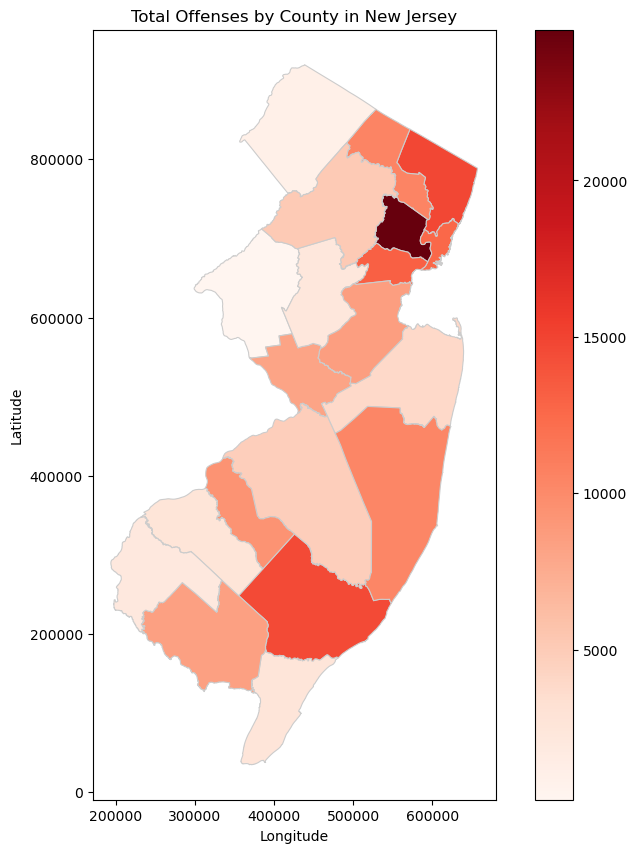

,county_name,TotalOffenses
6,ESSEX,24817.0
1,BERGEN,14782.0
0,ATLANTIC,14561.0


In [8]:
#Let's get the total number of offenses in county so we can visualize  it.
total_offenses_by_county = merged_county_df.groupby('county_name')['TotalOffenses'].sum().reset_index()

#Now let's pull in our New Jersey shapefile to create a Geo map.
nj_shapefile_path = '/Users/ebrushka/Desktop/County_Boundaries_of_NJ/County_Boundaries_of_NJ.shp'
nj_map = gpd.read_file(nj_shapefile_path)

#Merge GeoDataFrame with total_offenses_by_county DataFrame
merged_data = nj_map.merge(total_offenses_by_county, how='left', left_on='COUNTY', right_on='county_name')

#Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='TotalOffenses', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Total Offenses by County in New Jersey')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

#Just to validate that our map is correct let's look at the top 3 counties with the highest crime rates.
top_offenses_counties = total_offenses_by_county.nlargest(3, 'TotalOffenses')
top_offenses_counties
#checks out :)

### 3) Withing the highest crime rates areas, what are the crimes that are most common?

In [9]:
#Let's pull out our top three counties and look at those. 
top_three_counties = merged_county_df[merged_county_df['county_name'].isin(['ESSEX', 'BERGEN', 'ATLANTIC'])]

#Let's aggregate according to the counties so we have three rows. 
#Group by 'county_name' and sum up the crime numbers
aggregated_data = top_three_counties.groupby('county_name').sum()

#Drop the 'AgencyName' column
aggregated_data = aggregated_data.drop(columns='AgencyName')

#Reset the index to make 'county_name' a regular column
aggregated_data.reset_index(inplace=True)
aggregated_data

,county_name,TotalOffenses,CrimesAgainstPersons,CrimesAgainstProperty,CrimesAgainstSociety,AssaultOffenses,AggravatedAssault,SimpleAssault,Intimidation,HomicideOffenses,...,Betting/Wagering,Operating/Promoting/AssistingGambling,GamblingEquipmentViolations,SportsTampering,Por-nography/ObsceneMaterial,Pros-titutionOffenses,Pros-titution,AssistingorPromotingProstitution,PurchasingProstitution,WeaponLawViolations
0,ATLANTIC,14561.0,3760.0,9685.0,1116.0,3389.0,552.0,2182.0,655.0,10.0,...,0.0,0.0,0.0,0.0,15.0,3.0,0.0,3.0,0.0,470.0
1,BERGEN,14782.0,2845.0,11448.0,489.0,2735.0,381.0,1702.0,652.0,8.0,...,0.0,0.0,1.0,0.0,4.0,3.0,3.0,0.0,0.0,131.0
2,ESSEX,24817.0,6489.0,16457.0,1871.0,6093.0,1261.0,4416.0,416.0,59.0,...,0.0,0.0,2.0,0.0,6.0,95.0,95.0,0.0,0.0,987.0


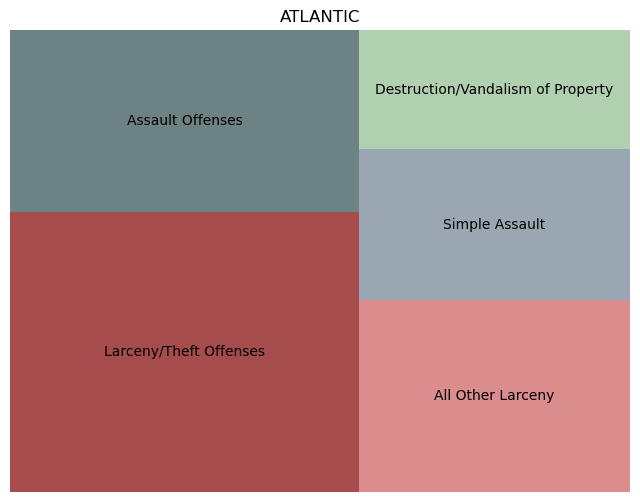

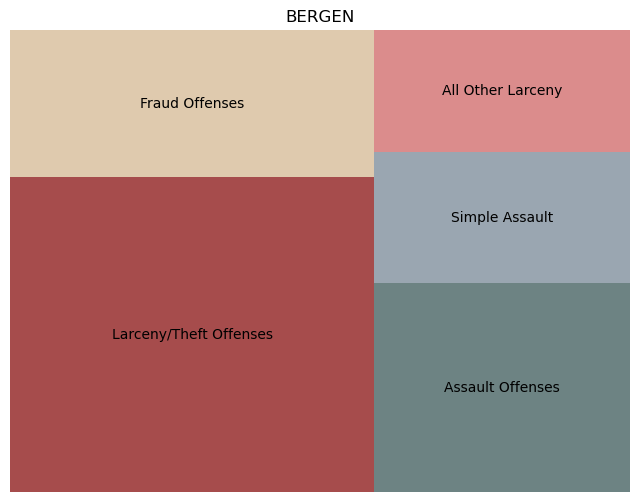

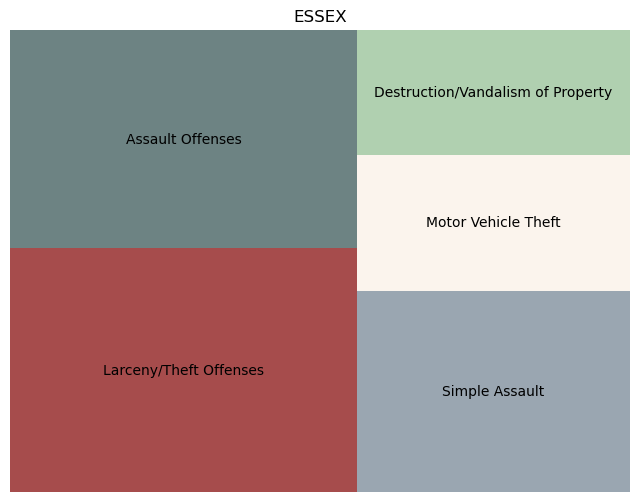

In [25]:
#Define function to get tree map systematically for all counties
def plot_treemap(county_data):
    labels = county_data.columns[5:]  # Exclude 'county_name' 'TotalOffenses' 'CrimesAgainstPersons' 'CrimesAgainstProperty' 'CrimesAgainstSociety'
                                      #Since they are general categories.
    sizes = county_data.iloc[:, 5:].values.flatten()

    #Get the top 5 crimes
    top_5_indices = sizes.argsort()[-5:][::-1]
    top_5_labels = [labels[i] for i in top_5_indices]
    top_5_sizes = [sizes[i] for i in top_5_indices]
    
    #Create a dictionary to change the labels that are on the map to look nicer.
    #Also assign colors so there is consistency within maps
    label_mapping = {
        'AssaultOffenses': ('Assault Offenses', 'darkslategrey'),
        'SimpleAssault': ('Simple Assault', 'slategrey'),
        'Larceny/TheftOffenses': ('Larceny/Theft Offenses', 'maroon'),
        'AllOtherLarceny': ('All Other Larceny', 'indianred'),
        'Destruction/Damage/VandalismofProperty': ('Destruction/Vandalism of Property', 'darkseagreen'),
        'MotorVehicleTheft': ('Motor Vehicle Theft', 'linen'),
        'FraudOffenses': ('Fraud Offenses', 'tan'),
        # Add more mappings as needed
    }

    #Replace existing labels and colors
    top_5_labels, colors = zip(*[label_mapping.get(label, (label, None)) for label in top_5_labels])

    #Plotting the treemap
    plt.figure(figsize=(8, 6))
    squarify.plot(sizes=top_5_sizes, label=top_5_labels, alpha=0.7, color=colors)
    plt.title(county_data['county_name'].iloc[0])
    plt.axis('off')
    plt.show()

#Plot treemaps for each county
for county_name, county_data in aggregated_data.groupby('county_name'):
    plot_treemap(county_data)

### 4) Is there a relantionship of crimes and the time they occur?/What time intervals have what type of crime the most? When is the most crime done?

In [11]:
#Heatmap!!!
#Let's create a new column for the "Total" for each time slot.
columns_to_sum = ['Total_person', 'Total_property', 'Total_society']
merged_time_df['Total_all'] = merged_time_df[columns_to_sum].sum(axis=1)

merged_time_df

,Time,Total_person,AssaultOffenses,HomicideOffenses,HumanTraffickingOffenses,Kidnapping/Abduction,SexOffenses,Total_property,Arson,Bribery,...,Robbery,StolenPropertyOffenses,Total_society,AnimalCruelty,Drug/NarcoticOffenses,GamblingOffenses,Pornography/ObsceneMaterial,ProstitutionOffenses,WeaponLawViolations,Total_all
0,Total,2988454.0,2737786.0,17189.0,2234.0,39098.0,192147.0,7849624.0,30166.0,652.0,...,149862.0,115445.0,1860969.0,20512.0,1459460.0,2121.0,39871.0,13007.0,325998.0,12699047.0
1,Total A.M. Hours,1132394.0,1025366.0,7279.0,1021.0,15342.0,83386.0,3222185.0,14740.0,264.0,...,57612.0,48184.0,733794.0,7906.0,572040.0,680.0,18570.0,3994.0,130604.0,5088373.0
2,Midnight–12:59 a.m.,236073.0,205981.0,1637.0,359.0,2899.0,25197.0,669628.0,2336.0,76.0,...,10032.0,7522.0,158929.0,1346.0,121412.0,91.0,5768.0,1171.0,29141.0,1064630.0
3,1 a.m.–1:59 a.m.,103834.0,96320.0,931.0,41.0,1512.0,5030.0,182610.0,1450.0,19.0,...,6264.0,4228.0,87137.0,192.0,68528.0,47.0,551.0,553.0,17266.0,373581.0
4,2 a.m.–2:59 a.m.,86737.0,80049.0,822.0,32.0,1282.0,4552.0,165874.0,1435.0,23.0,...,5843.0,3637.0,68955.0,140.0,53164.0,38.0,399.0,401.0,14813.0,321566.0
5,3 a.m.–3:59 a.m.,64945.0,59620.0,591.0,42.0,1033.0,3659.0,151263.0,1385.0,9.0,...,4823.0,2863.0,45427.0,126.0,35081.0,18.0,354.0,173.0,9675.0,261635.0
6,4 a.m.–4:59 a.m.,49015.0,44946.0,462.0,27.0,829.0,2751.0,133452.0,1286.0,11.0,...,3944.0,2176.0,27826.0,105.0,21073.0,16.0,255.0,76.0,6301.0,210293.0
7,5 a.m.–5:59 a.m.,42431.0,39002.0,361.0,23.0,681.0,2364.0,130620.0,1081.0,9.0,...,3544.0,1716.0,19706.0,138.0,14688.0,15.0,316.0,54.0,4495.0,192757.0
8,6 a.m.–6:59 a.m.,44740.0,41223.0,345.0,24.0,709.0,2439.0,157921.0,980.0,8.0,...,3134.0,2143.0,23144.0,209.0,17767.0,17.0,502.0,71.0,4578.0,225805.0
9,7 a.m.–7:59 a.m.,64495.0,59657.0,334.0,26.0,864.0,3614.0,211403.0,917.0,7.0,...,2919.0,3143.0,36493.0,458.0,29168.0,28.0,960.0,104.0,5775.0,312391.0


In [12]:
#Let's see in what time frame in a day most crime is happening.
#Specify values to keep
include_values = ['Total A.M. Hours', 'Total P.M. Hours']

#Remove rows with values not in include_values
new_dataframe = merged_time_df[merged_time_df['Time'].isin(include_values)]

#Select desired columns
selected_columns = ['Time', 'Total_person', 'Total_property', 'Total_society', 'Total_all']
time_frames = new_dataframe[selected_columns].copy()

#Set 'Time' as the index
time_frames.set_index('Time', inplace=True)
time_frames

,Total_person,Total_property,Total_society,Total_all
Time,,,,
Total A.M. Hours,1132394.0,3222185.0,733794.0,5088373.0
Total P.M. Hours,1826793.0,4507726.0,1101865.0,7436384.0


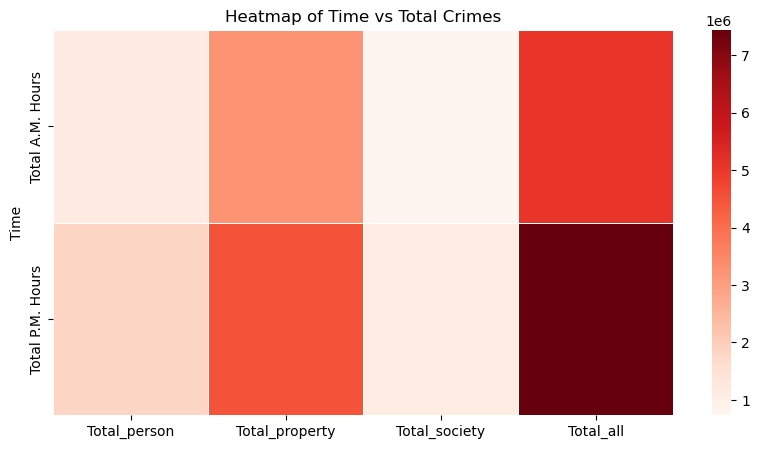

In [13]:
#Let's make a heatmap for these.
plt.figure(figsize=(10, 5))
sns.heatmap(time_frames, cmap='Reds', annot=False, cbar=True, linewidths=.5)
plt.title('Heatmap of Time vs Total Crimes')
plt.show()
#Looks like P.M. hours have more crime so let's look into that some more.

In [14]:
#Exclude all a.m.
include_values_am = ['Unknown Time of Day','Noon–12:59 p.m.', '1 p.m.–1:59 p.m.', '2 p.m.–2:59 p.m.', '3 p.m.–3:59 p.m.', '4 p.m.–4:59 p.m.', '5 p.m.–5:59 p.m.', '6 p.m.–6:59 p.m.', '7 p.m.–7:59 p.m.', '8 p.m.–8:59 p.m.', '9 p.m.–9:59 p.m.', '10 p.m.–10:59 p.m.', '11 p.m.–11:59 p.m.']

# Remove rows with values in exclude_values_am
night_hours = merged_time_df[merged_time_df['Time'].isin(include_values_am)]

# Select desired columns
selected_columns = ['Time', 'Total_person', 'Total_property', 'Total_society', 'Total_all']
night_hours = night_hours[selected_columns].copy()

# Set 'Time' as the index
night_hours.set_index('Time', inplace=True)
night_hours

,Total_person,Total_property,Total_society,Total_all
Time,,,,
Noon–12:59 p.m.,150085.0,520008.0,78127.0,748220.0
1 p.m.–1:59 p.m.,132060.0,381990.0,81059.0,595109.0
2 p.m.–2:59 p.m.,141487.0,399705.0,86785.0,627977.0
3 p.m.–3:59 p.m.,155974.0,426051.0,90228.0,672253.0
4 p.m.–4:59 p.m.,156115.0,426757.0,89370.0,672242.0
5 p.m.–5:59 p.m.,157724.0,446851.0,82812.0,687387.0
6 p.m.–6:59 p.m.,161399.0,408042.0,84230.0,653671.0
7 p.m.–7:59 p.m.,161129.0,352372.0,91365.0,604866.0
8 p.m.–8:59 p.m.,164597.0,342330.0,97614.0,604541.0


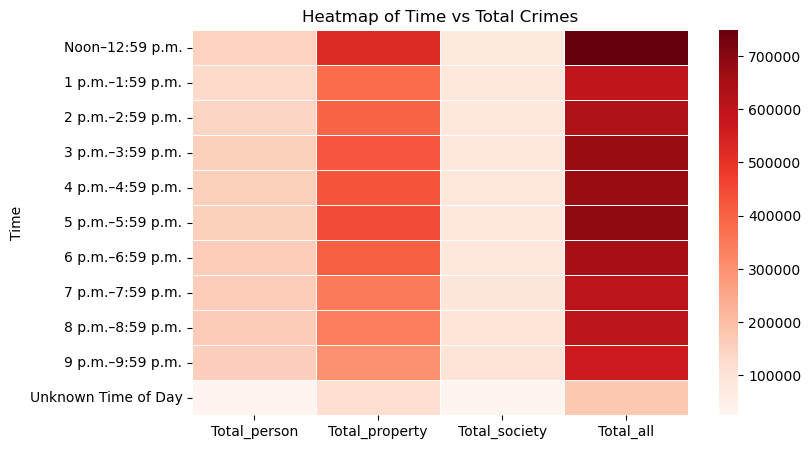

In [15]:
#Let's make a heatmap for these.
plt.figure(figsize=(8, 5))
sns.heatmap(night_hours, cmap='Reds', annot=False, cbar=True, linewidths=.5)
plt.title('Heatmap of Time vs Total Crimes')
plt.show()
#Looks like P.M. hours have more crime so let's look into that some more.

In [16]:
#IF we wanted to try to look at all of the hours, we can try grouping them bi-hourly.
exclude_values = ['Total A.M. Hours', 'Total P.M. Hours', 'Total']

#Remove rows with specified values in 'Time' column
merged_time_dff = merged_time_df[~merged_time_df['Time'].isin(exclude_values)]
merged_time_dff

#Let's pull out the columns we want to work with and put it in a new dataframe.
selected_columns = ['Time', 'Total_person', 'Total_property', 'Total_society', 'Total_all']
new_dataframe = merged_time_dff[selected_columns].copy()

#Let's make the time our index for the heatmap.
new_dataframe.reset_index(drop=True, inplace=True)
new_dataframe.set_index('Time', inplace=True)
new_dataframe

,Total_person,Total_property,Total_society,Total_all
Time,,,,
Midnight–12:59 a.m.,236073.0,669628.0,158929.0,1064630.0
1 a.m.–1:59 a.m.,103834.0,182610.0,87137.0,373581.0
2 a.m.–2:59 a.m.,86737.0,165874.0,68955.0,321566.0
3 a.m.–3:59 a.m.,64945.0,151263.0,45427.0,261635.0
4 a.m.–4:59 a.m.,49015.0,133452.0,27826.0,210293.0
5 a.m.–5:59 a.m.,42431.0,130620.0,19706.0,192757.0
6 a.m.–6:59 a.m.,44740.0,157921.0,23144.0,225805.0
7 a.m.–7:59 a.m.,64495.0,211403.0,36493.0,312391.0
8 a.m.–8:59 a.m.,97916.0,361330.0,55283.0,514529.0


In [17]:
#Let's group the time intervals together a bit. 
#Define a mapping of time intervals
time_columns_grouped = {
    'Midnight–1:59 a.m.': ['Midnight–12:59 a.m.', '1 a.m.–1:59 a.m.'],
    '2 a.m.–3:59 a.m.': ['2 a.m.–2:59 a.m.', '3 a.m.–3:59 a.m.'],
    '4 a.m.–5:59 a.m.': ['4 a.m.–4:59 a.m.', '5 a.m.–5:59 a.m.'],
    '6 a.m.–7:59 a.m.': ['6 a.m.–6:59 a.m.', '7 a.m.–7:59 a.m.'],
    '8 a.m.–9:59 a.m.': ['8 a.m.–8:59 a.m.', '9 a.m.–9:59 a.m.'],
    '10 a.m.–11:59 a.m.': ['10 a.m.–10:59 a.m.', '11 a.m.–11:59 a.m.'],
    'Noon–1:59 p.m.': ['Noon–12:59 p.m.', '1 p.m.–1:59 p.m.'],
    '2 p.m.–3:59 p.m.': ['2 p.m.–2:59 p.m.', '3 p.m.–3:59 p.m.'],
    '4 p.m.–5:59 p.m.': ['4 p.m.–4:59 p.m.', '5 p.m.–5:59 p.m.'],
    '6 p.m.–7:59 p.m.': ['6 p.m.–6:59 p.m.', '7 p.m.–7:59 p.m.'],
    '8 p.m.–9:59 p.m.': ['8 p.m.–8:59 p.m.', '9 p.m.–9:59 p.m.'],
    '10 p.m.–11:59 p.m.': ['10 p.m.–10:59 p.m.', '11 p.m.–11:59 p.m.'],
}

#Create a new column 'TimeInterval' based on the mapping
new_dataframe['TimeInterval'] = new_dataframe.index.map(lambda x: next((key for key, values in time_columns_grouped.items() if x in values), 'Unknown'))

#Handle 'Unknown' values separately
new_dataframe.loc[new_dataframe['TimeInterval'] == 'Unknown', 'TimeInterval'] = 'Unknown Time of Day'

#Exclude rows with specified values in 'TimeInterval' column
exclude_values = ['Unknown Time of Day']
grouped_df = new_dataframe[~new_dataframe['TimeInterval'].isin(exclude_values)].groupby('TimeInterval').sum()
grouped_df

,Total_person,Total_property,Total_society,Total_all
TimeInterval,,,,
2 a.m.–3:59 a.m.,151682.0,317137.0,114382.0,583201.0
2 p.m.–3:59 p.m.,297461.0,825756.0,177013.0,1300230.0
4 a.m.–5:59 a.m.,91446.0,264072.0,47532.0,403050.0
4 p.m.–5:59 p.m.,313839.0,873608.0,172182.0,1359629.0
6 a.m.–7:59 a.m.,109235.0,369324.0,59637.0,538196.0
6 p.m.–7:59 p.m.,322528.0,760414.0,175595.0,1258537.0
8 a.m.–9:59 a.m.,200488.0,695389.0,119044.0,1014921.0
8 p.m.–9:59 p.m.,324193.0,639571.0,200384.0,1164148.0
Midnight–1:59 a.m.,339907.0,852238.0,246066.0,1438211.0


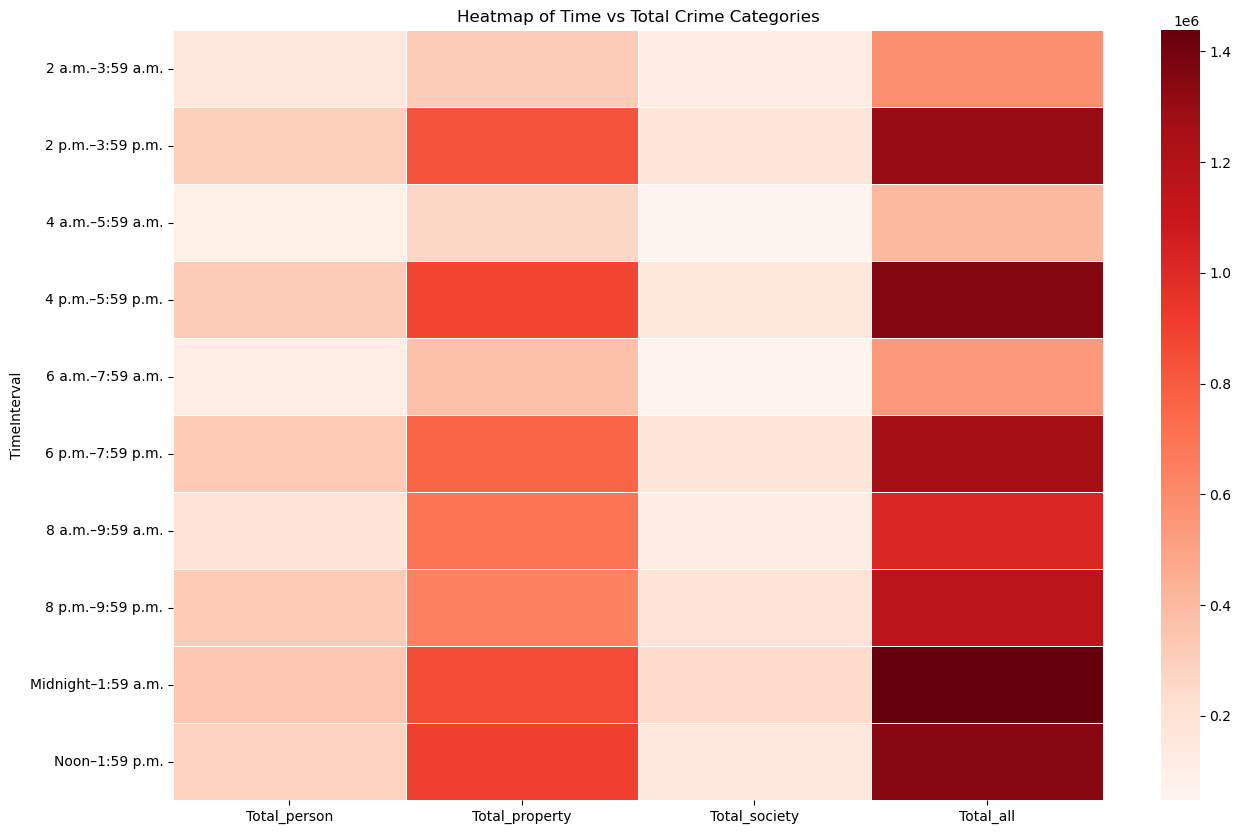

In [18]:
# Create a heatmap
#plt.figure(figsize=(15, 10))
#sns.heatmap(new_dataframe, cmap='Reds', annot=False, cbar=True, linewidths=.5)
#plt.title('Heatmap of Time vs Total Crime Categories')
#plt.show()
plt.figure(figsize=(15, 10))
sns.heatmap(grouped_df, cmap='Reds', annot=False, cbar=True, linewidths=.5)
plt.title('Heatmap of Time vs Total Crime Categories')
plt.show()

### 5) Where do different type of crimes happen the most(home,bus,school etc.)?

In [19]:
#Let's only keep the columns we need.
columns_of_interest = ['Location', 'Total_person', 'Total_property','Total_society']
merged_location_df = merged_location_df[columns_of_interest]
merged_location_df

,Location,Total_person,Total_property,Total_society
0,Total,3456189.0,7849624.0,1860969.0
1,Abandoned/Condemned Structure,1113.0,6365.0,1360.0
2,Air/Bus/Train Terminal,14852.0,31792.0,13847.0
3,Amusement Park,2534.0,4598.0,659.0
4,Arena/Stadium/Fairgrounds/Coliseum,4095.0,5574.0,700.0
5,ATM Separate From Bank,216.0,8874.0,138.0
6,Auto Dealership New/Used,2022.0,39292.0,969.0
7,Bank/Savings and Loan,2556.0,117544.0,1832.0
8,Bar/Nightclub,48480.0,41286.0,5836.0
9,Camp/Campground,4424.0,6966.0,1495.0


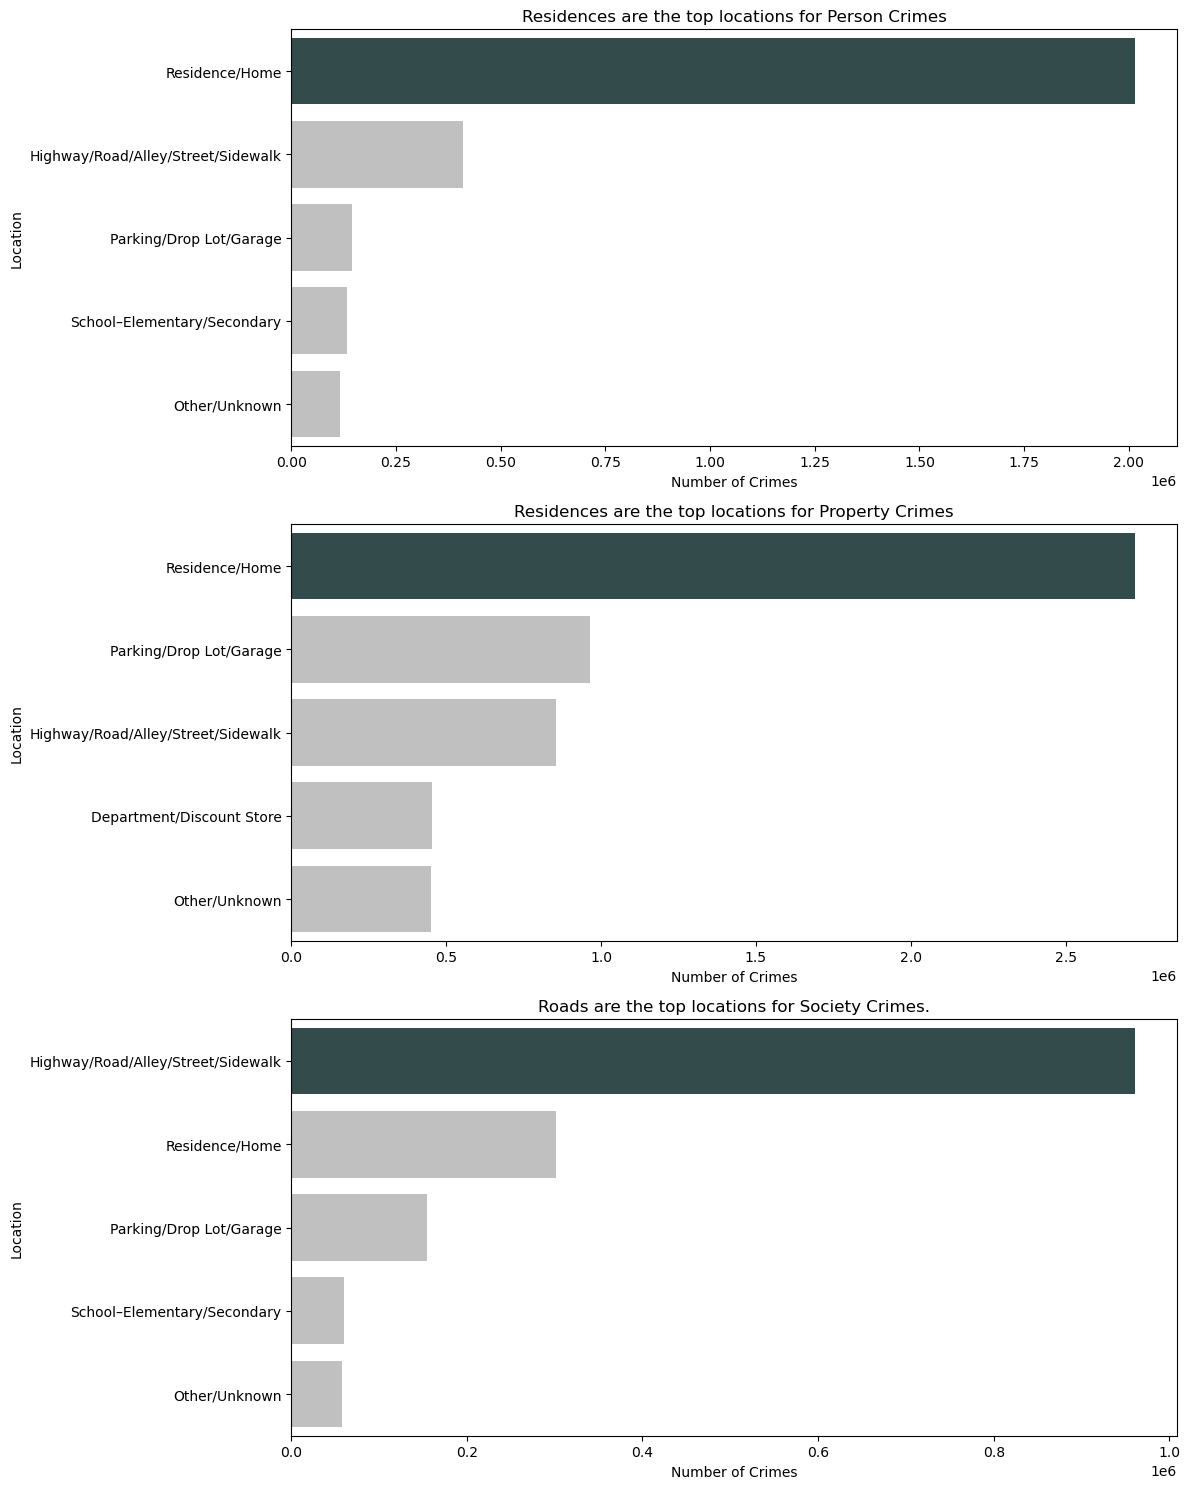

In [20]:
#Sort the DataFrame by each crime category in descending order
sorted_df_person = merged_location_df.sort_values(by='Total_person', ascending=False)
sorted_df_property = merged_location_df.sort_values(by='Total_property', ascending=False)
sorted_df_society = merged_location_df.sort_values(by='Total_society', ascending=False)

#Select the top 5 locations for each crime category
top5_person = sorted_df_person.head(6)[1:]  # Excluding the 'Total' row
top5_property = sorted_df_property.head(6)[1:]
top5_society = sorted_df_society.head(6)[1:]

colors = ['darkslategrey', 'silver', 'silver', 'silver', 'silver']
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

#Total_person
sns.barplot(x='Total_person', y='Location', data=top5_person, ax=axes[0], palette=colors)
axes[0].set_title('Residences are the top locations for Person Crimes')
axes[0].set_xlabel('Number of Crimes')

#Total_property
sns.barplot(x='Total_property', y='Location', data=top5_property, ax=axes[1], palette=colors)
axes[1].set_title('Residences are the top locations for Property Crimes')
axes[1].set_xlabel('Number of Crimes')

#Total_society
sns.barplot(x='Total_society', y='Location', data=top5_society, ax=axes[2], palette=colors)
axes[2].set_title('Roads are the top locations for Society Crimes.')
axes[2].set_xlabel('Number of Crimes')

plt.tight_layout()
plt.show()